

```
# Name: Sudarsun S

# Email: sudarsun.s2020@vitstudent.ac.in

# Training: Applied Data Science
```



# ADS Assignment 2
## Titanic Ship Case Study
Problem Description: On April 15, 1912, during her maiden voyage, the Titanic sank after colliding with an iceberg, killing 1502 out of 2224 passengers and crew. Translated 32% survival rate.


*   One of the reasons that the shipwreck led to such loss of life was that there were not enough lifeboats for the passengers and crew.
*   Although there was some element of luck involved in surviving the sinking, some groups of people were more likely to survive than others, such as women, children, and the upper-class.



The problem associated with the Titanic dataset is to predict whether a passenger survived the disaster or not. The dataset contains various features such as passenger class, age, gender, cabin, fare, and whether the passenger had any siblings or spouses on board. These features can be used to build a predictive model to determine the likelihood of a passenger surviving the disaster. The dataset offers opportunities for feature engineering, data visualization, and model selection, making it a valuable resource for developing and testing data analysis and machine learning skills.

Perform Below Tasks to complete the assignment:-
1. Download the dataset: Dataset
2. Load the dataset.

In [ ]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
import numpy as np


In [ ]:
data = pd.read_csv("titanic.csv")
data

,survived,pclass,sex,age,sibsp,parch,fare,embarked,class,who,adult_male,deck,embark_town,alive,alone
0,0,3,male,22.0,1,0,7.2500,S,Third,man,True,NaN,Southampton,no,False
1,1,1,female,38.0,1,0,71.2833,C,First,woman,False,C,Cherbourg,yes,False
2,1,3,female,26.0,0,0,7.9250,S,Third,woman,False,NaN,Southampton,yes,True
3,1,1,female,35.0,1,0,53.1000,S,First,woman,False,C,Southampton,yes,False
4,0,3,male,35.0,0,0,8.0500,S,Third,man,True,NaN,Southampton,no,True
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
886,0,2,male,27.0,0,0,13.0000,S,Second,man,True,NaN,Southampton,no,True
887,1,1,female,19.0,0,0,30.0000,S,First,woman,False,B,Southampton,yes,True
888,0,3,female,NaN,1,2,23.4500,S,Third,woman,False,NaN,Southampton,no,False
889,1,1,male,26.0,0,0,30.0000,C,First,man,True,C,Cherbourg,yes,True


3. Perform Below Visualizations.

*   Univariate Analysis

  

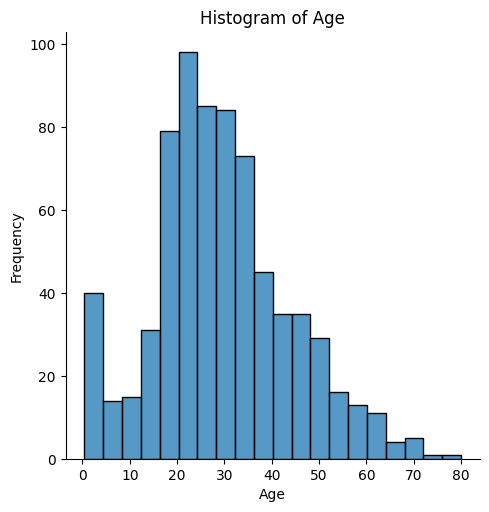

In [ ]:
sns.displot(data.age)
plt.title("Histogram of Age")
plt.xlabel("Age")
plt.ylabel("Frequency")
plt.show()

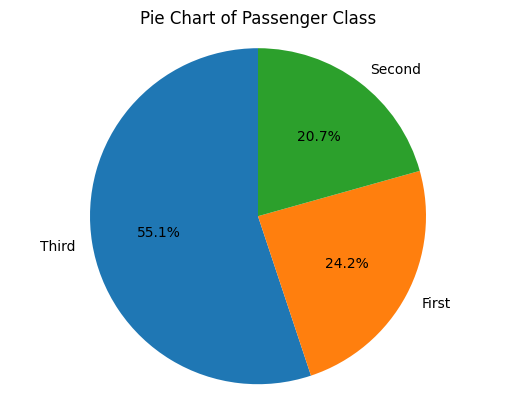

In [ ]:
class_counts = data['class'].value_counts()
plt.pie(class_counts, labels=class_counts.index, autopct='%1.1f%%', startangle=90)
plt.axis('equal')
plt.title('Pie Chart of Passenger Class')
plt.show()

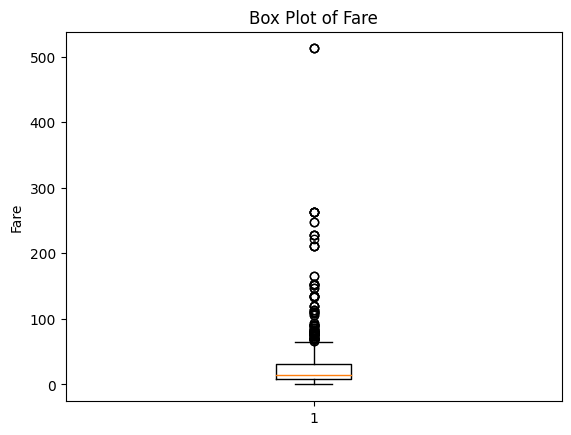

In [ ]:
plt.boxplot(data['fare'].dropna())
plt.ylabel('Fare')
plt.title('Box Plot of Fare')
plt.show()



*   Bi - Variate Analysis



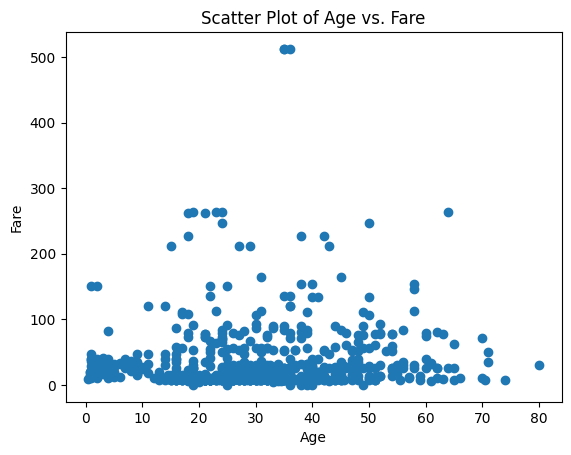

In [ ]:
plt.scatter(data['age'], data['fare'])
plt.xlabel('Age')
plt.ylabel('Fare')
plt.title('Scatter Plot of Age vs. Fare')
plt.show()

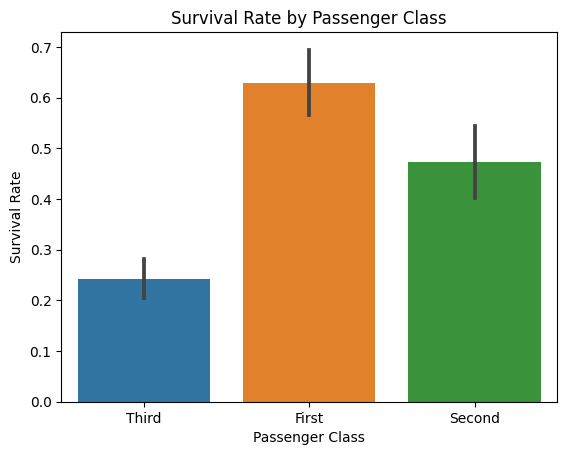

In [ ]:
sns.barplot(x=data['class'], y=data['survived'])
plt.xlabel('Passenger Class')
plt.ylabel('Survival Rate')
plt.title('Survival Rate by Passenger Class')
plt.show()

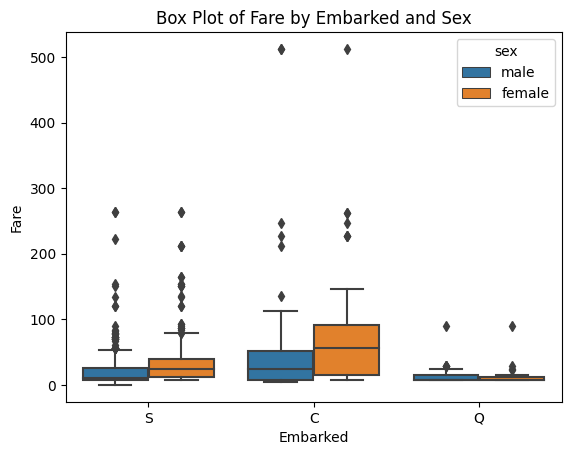

In [ ]:
sns.boxplot(x='embarked', y='fare', hue='sex', data=data)
plt.xlabel('Embarked')
plt.ylabel('Fare')
plt.title('Box Plot of Fare by Embarked and Sex')
plt.show()



*   Multi - Variate Analysis



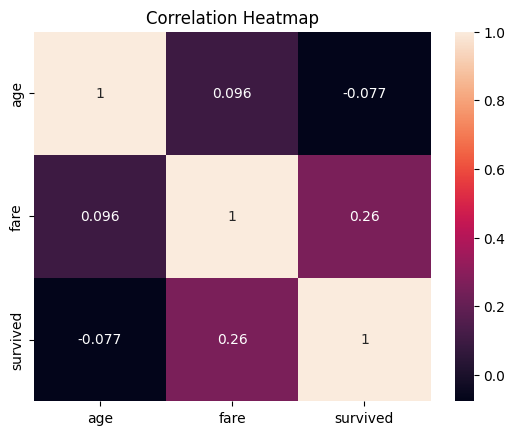

In [ ]:
correlation_matrix = data[['age', 'fare', 'survived']].corr()
sns.heatmap(correlation_matrix, annot=True)
plt.title('Correlation Heatmap')
plt.show()

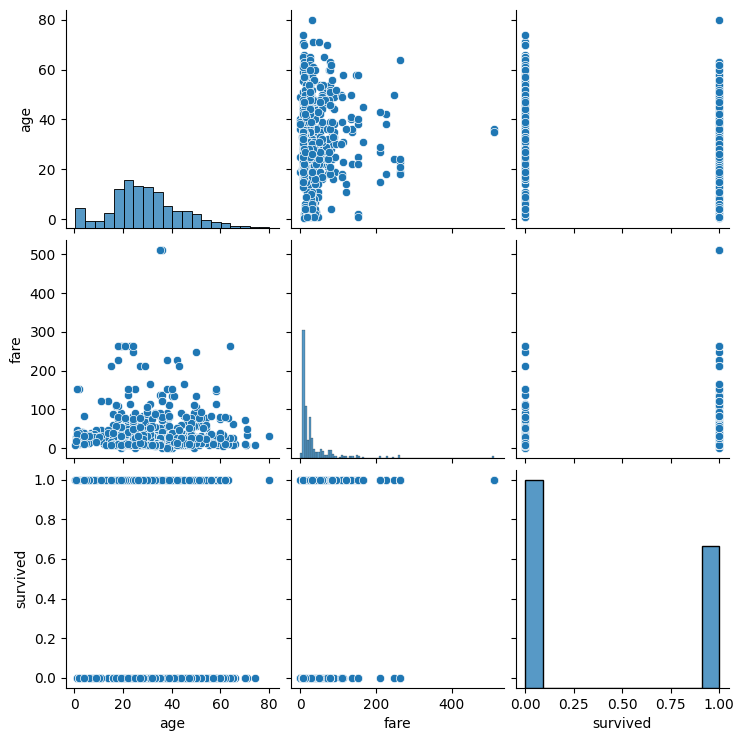

In [ ]:
sns.pairplot(data[['age', 'fare', 'survived']].dropna())
plt.show()

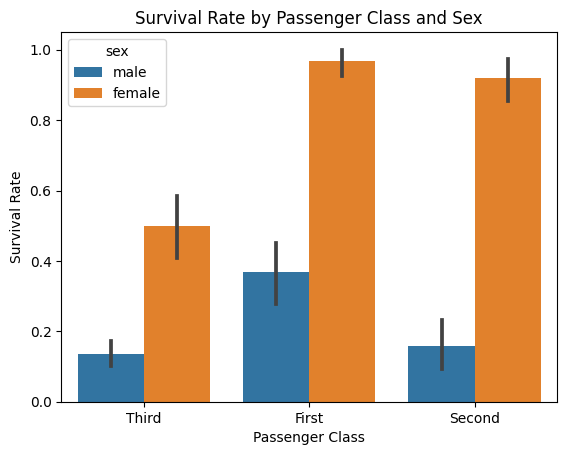

In [ ]:
sns.barplot(x='class', y='survived', hue='sex', data=data)
plt.xlabel('Passenger Class')
plt.ylabel('Survival Rate')
plt.title('Survival Rate by Passenger Class and Sex')
plt.show()

### 4. Perform descriptive statistics on the dataset.

In [ ]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 891 entries, 0 to 890
Data columns (total 15 columns):
 #   Column       Non-Null Count  Dtype  
---  ------       --------------  -----  
 0   survived     891 non-null    int64  
 1   pclass       891 non-null    int64  
 2   sex          891 non-null    object 
 3   age          714 non-null    float64
 4   sibsp        891 non-null    int64  
 5   parch        891 non-null    int64  
 6   fare         891 non-null    float64
 7   embarked     889 non-null    object 
 8   class        891 non-null    object 
 9   who          891 non-null    object 
 10  adult_male   891 non-null    bool   
 11  deck         203 non-null    object 
 12  embark_town  889 non-null    object 
 13  alive        891 non-null    object 
 14  alone        891 non-null    bool   
dtypes: bool(2), float64(2), int64(4), object(7)
memory usage: 92.4+ KB


In [ ]:
data.describe()

,survived,pclass,age,sibsp,parch,fare
count,891.000000,891.000000,714.000000,891.000000,891.000000,891.000000
mean,0.383838,2.308642,29.699118,0.523008,0.381594,32.204208
std,0.486592,0.836071,14.526497,1.102743,0.806057,49.693429
min,0.000000,1.000000,0.420000,0.000000,0.000000,0.000000
25%,0.000000,2.000000,20.125000,0.000000,0.000000,7.910400
50%,0.000000,3.000000,28.000000,0.000000,0.000000,14.454200
75%,1.000000,3.000000,38.000000,1.000000,0.000000,31.000000
max,1.000000,3.000000,80.000000,8.000000,6.000000,512.329200


In [ ]:
data.median()

<ipython-input-59-135339ac59ce>:1: FutureWarning: The default value of numeric_only in DataFrame.median is deprecated. In a future version, it will default to False. In addition, specifying 'numeric_only=None' is deprecated. Select only valid columns or specify the value of numeric_only to silence this warning.
  data.median()


survived       0.0000
pclass         3.0000
age           28.0000
sibsp          0.0000
parch          0.0000
fare          14.4542
adult_male     1.0000
alone          1.0000
dtype: float64

In [ ]:
data.mode()

,survived,pclass,sex,age,sibsp,parch,fare,embarked,class,who,adult_male,deck,embark_town,alive,alone
0,0,3,male,24.0,0,0,8.05,S,Third,man,True,C,Southampton,no,True


### 5. Handle the Missing values.

In [ ]:
data.isnull().sum()

survived         0
pclass           0
sex              0
age            177
sibsp            0
parch            0
fare             0
embarked         2
class            0
who              0
adult_male       0
deck           688
embark_town      2
alive            0
alone            0
dtype: int64

In [ ]:
#dropping columns which contains missing values
print(data.shape,"\n")
data_dropped = data.dropna()
print(data_dropped.isnull().sum())
print("\n",data_dropped.shape)

(891, 15) 

survived       0
pclass         0
sex            0
age            0
sibsp          0
parch          0
fare           0
embarked       0
class          0
who            0
adult_male     0
deck           0
embark_town    0
alive          0
alone          0
dtype: int64

 (182, 15)


In [ ]:
data_dropped

,survived,pclass,sex,age,sibsp,parch,fare,embarked,class,who,adult_male,deck,embark_town,alive,alone
1,1,1,female,38.0,1,0,71.2833,C,First,woman,False,C,Cherbourg,yes,False
3,1,1,female,35.0,1,0,53.1000,S,First,woman,False,C,Southampton,yes,False
6,0,1,male,54.0,0,0,51.8625,S,First,man,True,E,Southampton,no,True
10,1,3,female,4.0,1,1,16.7000,S,Third,child,False,G,Southampton,yes,False
11,1,1,female,58.0,0,0,26.5500,S,First,woman,False,C,Southampton,yes,True
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
871,1,1,female,47.0,1,1,52.5542,S,First,woman,False,D,Southampton,yes,False
872,0,1,male,33.0,0,0,5.0000,S,First,man,True,B,Southampton,no,True
879,1,1,female,56.0,0,1,83.1583,C,First,woman,False,C,Cherbourg,yes,False
887,1,1,female,19.0,0,0,30.0000,S,First,woman,False,B,Southampton,yes,True


In [ ]:
#filling missing for numerical values and dropping categorical values
data_filled = data.fillna({'age': data['age'].mean(),'deck':data['deck'].mode()[0]})
data_filled = data_filled.dropna()
print(data_filled.isnull().sum(),"\n")
print(data_filled.shape)

survived       0
pclass         0
sex            0
age            0
sibsp          0
parch          0
fare           0
embarked       0
class          0
who            0
adult_male     0
deck           0
embark_town    0
alive          0
alone          0
dtype: int64 

(889, 15)


In [ ]:
data_filled

,survived,pclass,sex,age,sibsp,parch,fare,embarked,class,who,adult_male,deck,embark_town,alive,alone
0,0,3,male,22.000000,1,0,7.2500,S,Third,man,True,C,Southampton,no,False
1,1,1,female,38.000000,1,0,71.2833,C,First,woman,False,C,Cherbourg,yes,False
2,1,3,female,26.000000,0,0,7.9250,S,Third,woman,False,C,Southampton,yes,True
3,1,1,female,35.000000,1,0,53.1000,S,First,woman,False,C,Southampton,yes,False
4,0,3,male,35.000000,0,0,8.0500,S,Third,man,True,C,Southampton,no,True
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
886,0,2,male,27.000000,0,0,13.0000,S,Second,man,True,C,Southampton,no,True
887,1,1,female,19.000000,0,0,30.0000,S,First,woman,False,B,Southampton,yes,True
888,0,3,female,29.699118,1,2,23.4500,S,Third,woman,False,C,Southampton,no,False
889,1,1,male,26.000000,0,0,30.0000,C,First,man,True,C,Cherbourg,yes,True


### 6. Find the outliers and replace the outliers

In [ ]:
Q1 = data_filled['age'].quantile(0.25)
Q3 = data_filled['age'].quantile(0.75)
IQR = Q3 - Q1

lower_bound = Q1 - 1.5 * IQR
upper_bound = Q3 + 1.5 * IQR

outliers = data_filled[(data_filled['age'] < lower_bound) | (data_filled['age'] > upper_bound)]
print("Outliers:")
print(outliers[['age', 'fare']])

data_filled['age'] = np.where((data_filled['age'] < lower_bound) | (data_filled['age'] > upper_bound), np.nan, data_filled['age'])

num_replaced = data_filled['age'].isnull().sum()
print("Number of replaced outliers:", num_replaced)

Outliers:
       age     fare
7     2.00  21.0750
11   58.00  26.5500
15   55.00  16.0000
16    2.00  29.1250
33   66.00  10.5000
..     ...      ...
824   2.00  39.6875
827   1.00  37.0042
831   0.83  18.7500
851  74.00   7.7750
879  56.00  83.1583

[65 rows x 2 columns]
Number of replaced outliers: 65


In [ ]:
data_filled = data_filled.dropna()
data_filled.shape

(824, 15)

### 7. Check for Categorical columns and perform encoding.

In [ ]:
from sklearn.preprocessing import LabelEncoder

categorical_columns = data_filled.select_dtypes(include='object').columns
print("Categorical Columns:")
print(categorical_columns)

label_encoder = LabelEncoder()

for column in categorical_columns:
    data_filled[column] = label_encoder.fit_transform(data_filled[column])

print("Encoded Dataset:")
print(data_filled.head())


Categorical Columns:
Index(['sex', 'embarked', 'class', 'who', 'deck', 'embark_town', 'alive'], dtype='object')
Encoded Dataset:
   survived  pclass  sex   age  sibsp  parch     fare  embarked  class  who  \
0         0       3    1  22.0      1      0   7.2500         2      2    1   
1         1       1    0  38.0      1      0  71.2833         0      0    2   
2         1       3    0  26.0      0      0   7.9250         2      2    2   
3         1       1    0  35.0      1      0  53.1000         2      0    2   
4         0       3    1  35.0      0      0   8.0500         2      2    1   

   adult_male  deck  embark_town  alive  alone  
0        True     2            2      0  False  
1       False     2            0      1  False  
2       False     2            2      1   True  
3       False     2            2      1  False  
4        True     2            2      0   True  


<ipython-input-13-b722df3583c9>:10: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  data_filled[column] = label_encoder.fit_transform(data_filled[column])
<ipython-input-13-b722df3583c9>:10: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  data_filled[column] = label_encoder.fit_transform(data_filled[column])
<ipython-input-13-b722df3583c9>:10: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in th

### 8. Split the data into dependent and independent variables.

In [ ]:
X = data_filled.drop('survived', axis=1) 
y = data_filled['survived']

print("Independent Variables (Features):")
print(X.head())

print("\nDependent Variable (Target):")
print(y.head())


Independent Variables (Features):
   pclass  sex   age  sibsp  parch     fare  embarked  class  who  adult_male  \
0       3    1  22.0      1      0   7.2500         2      2    1        True   
1       1    0  38.0      1      0  71.2833         0      0    2       False   
2       3    0  26.0      0      0   7.9250         2      2    2       False   
3       1    0  35.0      1      0  53.1000         2      0    2       False   
4       3    1  35.0      0      0   8.0500         2      2    1        True   

   deck  embark_town  alive  alone  
0     2            2      0  False  
1     2            0      1  False  
2     2            2      1   True  
3     2            2      1  False  
4     2            2      0   True  

Dependent Variable (Target):
0    0
1    1
2    1
3    1
4    0
Name: survived, dtype: int64


### 9. Scale the independent variables

In [ ]:
from sklearn.preprocessing import StandardScaler
scaler = StandardScaler()
X_scaled = scaler.fit_transform(X)
X_scaled_df = pd.DataFrame(X_scaled, columns=X.columns)
X = X_scaled_df
print("Scaled Independent Variables:")
print(X.head())

Scaled Independent Variables:
     pclass       sex       age     sibsp     parch      fare  embarked  \
0  0.797981  0.742825 -0.674867  0.450704 -0.448352 -0.484194  0.582407   
1 -1.632837 -1.346212  0.897191  0.450704 -0.448352  0.798324 -1.963499   
2  0.797981 -1.346212 -0.281852 -0.466284 -0.448352 -0.470674  0.582407   
3 -1.632837 -1.346212  0.602430  0.450704 -0.448352  0.434132  0.582407   
4  0.797981  0.742825  0.602430 -0.466284 -0.448352 -0.468171  0.582407   

      class       who  adult_male      deck  embark_town     alive     alone  
0  0.797981 -0.426162    0.794785 -0.131758     0.582407 -0.782639 -1.254990  
1 -1.632837  1.320891   -1.258202 -0.131758    -1.963499  1.277728 -1.254990  
2  0.797981  1.320891   -1.258202 -0.131758     0.582407  1.277728  0.796819  
3 -1.632837  1.320891   -1.258202 -0.131758     0.582407  1.277728 -1.254990  
4  0.797981 -0.426162    0.794785 -0.131758     0.582407 -0.782639  0.796819  


In [ ]:
from sklearn.model_selection import train_test_split

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=0)

print("Training set shape:", X_train.shape)
print("Testing set shape:", X_test.shape)

Training set shape: (659, 14)
Testing set shape: (165, 14)
